In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

In [2]:
seeds = np.arange(100)
random_state=42

In [3]:
data = pd.read_csv('..\\Data\\ze41_mol_desc_db_red.csv', header=0, sep=';', decimal=',')

In [4]:
col_names = data.columns
#col_names = col_names.drop(labels=['HOMO / eV', 'LUMO / eV'])
X = data[col_names[3:]]
y = data[col_names[1]]

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=random_state)
[X_train, X_valid, y_train, y_valid] = [pd.DataFrame(x) for x in [X_train, X_valid, y_train, y_valid]]

In [6]:
scalex = MinMaxScaler(feature_range=(-1,1))
scalex.fit(X_train)
[X_train_sc, X_valid_sc] = [pd.DataFrame(scalex.transform(x), columns=X.columns) for x in [X_train, X_valid]]

In [7]:
scaley = MinMaxScaler(feature_range=(0, 1))
scaley.fit(y_train)
[y_train_sc, y_valid_sc] = [pd.DataFrame(scaley.transform(y), columns=y.columns) for y in [y_train, y_valid]]

In [8]:
#X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.1, random_state=random_state)
#X_train = pd.DataFrame(X_train)
#X_train.columns = X.columns
#X_valid = pd.DataFrame(X_valid)
#X_valid.columns = X.columns

In [9]:
selected_cols = []

In [10]:
select_percent = 5
sel_no_cols = int(len(X_train_sc.columns)*select_percent/100)
sel_no_cols

63

In [11]:
for seed in seeds:
    rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True, bootstrap=True, random_state=seed)
    selector = RFE(rf, n_features_to_select=sel_no_cols, step=0.1).fit(X_train_sc, np.ravel(y_train_sc))
    selected_cols.append([X_train_sc.columns[i] for i in range(len(selector.support_)) if selector.support_[i]])

In [12]:
vals, counts = np.unique(selected_cols, axis=0, return_counts=True)

In [13]:
counts

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [14]:
all_sel_cols = [c for lst in selected_cols for c in lst]

In [15]:
vals_cols, counts_cols = np.unique(all_sel_cols, axis=0, return_counts=True)

In [16]:
distr = [len([c for c in counts_cols if c > i]) for i in seeds]

In [17]:
distr[84:]

[16, 15, 15, 14, 14, 13, 12, 11, 11, 11, 10, 10, 9, 7, 6, 5]

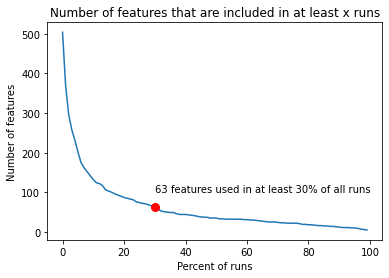

In [18]:
fig, ax = plt.subplots()
ax.plot(seeds, distr)
ax.plot(30, 63, 'ro', markersize=8)
ax.annotate('63 features used in at least 30% of all runs', xy=(30, 63), xytext=(30, 100))
plt.ylabel('Number of features')
plt.xlabel('Percent of runs')
plt.title('Number of features that are included in at least x runs')
#plt.yscale('log')
#plt.ylim([0, 63])
plt.show()

In [19]:
counts_cols, vals_cols = zip(*sorted(zip(counts_cols, vals_cols), reverse=True))

In [20]:
vals_cols[:distr[84]]

('P_VSA_MR_5',
 'Mor22s',
 'Mor04m',
 'LUMO / eV',
 'E1p',
 'HOMO / eV',
 'P_VSA_LogP_2',
 'Mor29v',
 'MATS5v',
 'Mor14s',
 'Mor14u',
 'CATS3D_02_AP',
 'GATS5v',
 'MATS5m',
 'GATS2s',
 'Mor32m')

In [21]:
rf_sel = ['VE2_G/D',
 'Eig14_EA(dm)',
 'Mor31m',
 'TDB04u',
 'HATS1e',
 'HATS3p',
 'RDF015p',
 'Mor17s',
 'N-072',
 'O-057',
 'MATS2m',
 'E2m',
 'RDF035v',
 'Dp',
 'CATS2D_00_AA',
 'CATS3D_03_DL',
 'SpPosA_D/Dt',
 'CATS2D_02_AP',
 'SpMaxA_EA(bo)',
 'F03[C-N]',
 'RDF080e',
 'Chi_RG',
 'HATS0e',
 'CATS2D_06_PP',
 'Eta_beta_A',
 'SaaNH',
 'MATS3v',
 'SpMax6_Bh(s)',
 'Mor09s',
 'CATS2D_02_PL',
 'HATS6p',
 'Chi_Dz(e)',
 'SsOH',
 'Mor19p',
 'H4i',
 'Eta_FL_A',
 'SAacc',
 'R6m+',
 'SpMAD_B(s)',
 'SpMAD_G/D',
 'R5m',
 'TDB04i',
 'nOHs',
 'SM07_EA(bo)',
 'GATS2m',
 'SpMax2_Bh(e)',
 'R4s',
 'GATS6v',
 'Ts',
 'CATS2D_07_DD',
 'CATS2D_04_AL',
 'F06[C-C]',
 'RDF045m',
 'nRNR2',
 'HATS2m',
 'H5v',
 'X3Av',
 'SIC1',
 'MATS6p',
 'RDF055v',
 'B03[O-O]',
 'G2p',
 'SpMAD_EA(bo)']

In [22]:
#training_cols = list(vals_cols[:sel_no_cols])
training_cols = rf_sel
X_sel_train = X_train[training_cols]
X_sel_valid = X_valid[training_cols]

In [23]:
model = keras.models.Sequential([
    #keras.layers.GaussianNoise(stddev=0.1),
    keras.layers.Dense(50, activation='relu', input_shape=(sel_no_cols,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1)
])

In [24]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.005),
    loss='mean_squared_error')

In [25]:
history = model.fit(X_sel_train, y_train, validation_data=(X_sel_valid, y_valid), epochs=25)

Epoch 1/25
2/2 [==============================] - 0s 55ms/step - loss: 8985.0820 - val_loss: 4818.3130
Epoch 2/25
2/2 [==============================] - 0s 8ms/step - loss: 8662.0635 - val_loss: 4966.5044
Epoch 3/25
2/2 [==============================] - 0s 8ms/step - loss: 8379.3047 - val_loss: 5206.3833
Epoch 4/25
2/2 [==============================] - 0s 8ms/step - loss: 8155.5972 - val_loss: 5508.9766
Epoch 5/25
2/2 [==============================] - 0s 8ms/step - loss: 8073.8662 - val_loss: 5898.2598
Epoch 6/25
2/2 [==============================] - 0s 8ms/step - loss: 8080.7812 - val_loss: 6242.2417
Epoch 7/25
2/2 [==============================] - 0s 8ms/step - loss: 8104.8633 - val_loss: 6316.8501
Epoch 8/25
2/2 [==============================] - 0s 8ms/step - loss: 8121.9272 - val_loss: 6259.8726
Epoch 9/25
2/2 [==============================] - 0s 8ms/step - loss: 8079.9883 - val_loss: 6204.2944
Epoch 10/25
2/2 [==============================] - 0s 8ms/step - loss: 8055.9106 

In [26]:
y_pred = model.predict(X_sel_valid)

In [27]:
for i in range(y_pred.shape[0]):
    print('true: {}, predicted: {:.3f}'.format(y_valid.iloc[i], y_pred[i, 0]))

true: inhibition efficiency ZE41 / %   -157
Name: 0, dtype: int64, predicted: -37.497
true: inhibition efficiency ZE41 / %    39
Name: 5, dtype: int64, predicted: -28.104
true: inhibition efficiency ZE41 / %    12
Name: 36, dtype: int64, predicted: -35.437
true: inhibition efficiency ZE41 / %   -6
Name: 45, dtype: int64, predicted: -28.854
true: inhibition efficiency ZE41 / %    38
Name: 13, dtype: int64, predicted: -46.810
true: inhibition efficiency ZE41 / %   -17
Name: 54, dtype: int64, predicted: -32.828


In [28]:
for i in range(y_pred.shape[0]):
    print('true: {:.0f}, predicted: {:.0f}'.format(y_valid.iloc[i]*345-270, y_pred[i, 0]*345-270))

TypeError: unsupported format string passed to Series.__format__

In [29]:
y_valid

,inhibition efficiency ZE41 / %
0,-157
5,39
36,12
45,-6
13,38
54,-17


In [30]:
counts_cols[-316]

6

In [31]:
vals_cols[:15]

('P_VSA_MR_5',
 'Mor22s',
 'Mor04m',
 'LUMO / eV',
 'E1p',
 'HOMO / eV',
 'P_VSA_LogP_2',
 'Mor29v',
 'MATS5v',
 'Mor14s',
 'Mor14u',
 'CATS3D_02_AP',
 'GATS5v',
 'MATS5m',
 'GATS2s')

In [32]:
len(list(vals_cols[:sel_no_cols]) + rf_sel)

126

In [33]:
list(vals_cols[:sel_no_cols])

['P_VSA_MR_5',
 'Mor22s',
 'Mor04m',
 'LUMO / eV',
 'E1p',
 'HOMO / eV',
 'P_VSA_LogP_2',
 'Mor29v',
 'MATS5v',
 'Mor14s',
 'Mor14u',
 'CATS3D_02_AP',
 'GATS5v',
 'MATS5m',
 'GATS2s',
 'Mor32m',
 'H3m',
 'TDB04s',
 'E2s',
 'R5p+',
 'R2e+',
 'ISH',
 'DISPm',
 'R5i+',
 'Mor04i',
 'Ds',
 'Mor03s',
 'E2m',
 'Mor28s',
 'Mor11u',
 'TDB03m',
 'Mor19m',
 'VE2sign_G',
 'SpMAD_RG',
 'R3s+',
 'R5e+',
 'E2v',
 'Mor15i',
 'T(N..O)',
 'R2u+',
 'MATS8p',
 'Eta_epsi_5',
 'MATS4s',
 'H0v',
 'Hy',
 'E1i',
 'VE1sign_G',
 'Mor15s',
 'E3e',
 'Mor13u',
 'Eig03_AEA(dm)',
 'X4Av',
 'P_VSA_e_3',
 'Mor29e',
 'Mor16m',
 'GATS5m',
 'E3p',
 'E2e',
 'X3Av',
 'Mor19u',
 'GATS4s',
 'E3v',
 'TDB04m']

In [ ]:
vals_cols.index('Hlgap / e')